# CNN (텐서플로 1.x)

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [12]:
# relu : x가 0보다 크면 x리턴, 0보다 작으면 0 리턴
def relu(x):
  return np.max(x, 0)
  
print("relut 함수",relu(-10))
print("relu 함수,배열",relu(np.array([10])))
print("텐서플로가 제공하는 relu",tf.nn.relu(np.array([10])))

relut 함수 -10
relu 함수,배열 10
텐서플로가 제공하는 relu tf.Tensor([10], shape=(1,), dtype=int64)


In [17]:
image = np.array([
                  [
                  [[1], [2], [3]],
                  [[4], [5], [6]],
                  [[7], [8], [9]]
                  ]
], dtype = 'float32')

In [19]:
image.shape

(1, 3, 3, 1)

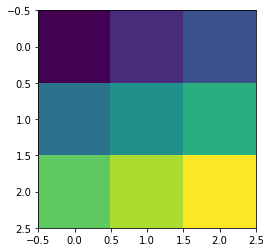

In [21]:
plt.imshow(image.reshape(3,3))

In [31]:
# weight
weight = np.array([
                   [1,1],
                   [1,1]
      
],dtype = 'float32')
# shape 출력
print("weight.shape",weight.shape)

# reshape 출력
weight = weight.reshape(2,2,1,1)
print("weight.reshape",weight.shape)

weight.shape (2, 2)
weight.reshape (2, 2, 1, 1)


In [34]:
# 합성곱 연산
# padding = 'same' : 제로 패딩
conv2d = tf.nn.conv2d(image, weight, strides=1, padding="SAME")
conv2d

<tf.Tensor: id=11, shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[12.],
         [16.],
         [ 9.]],

        [[24.],
         [28.],
         [15.]],

        [[15.],
         [17.],
         [ 9.]]]], dtype=float32)>

In [35]:
# 맥스풀링
tf.nn.max_pool(conv2d, ksize = 2, strides = 1, padding = 'VALID')

<tf.Tensor: id=12, shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[28.],
         [28.]],

        [[28.],
         [28.]]]], dtype=float32)>

In [38]:
tf.nn.max_pool(conv2d, ksize = 2, strides = 1, padding = 'SAME')

<tf.Tensor: id=15, shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[28.],
         [28.],
         [15.]],

        [[28.],
         [28.],
         [15.]],

        [[17.],
         [17.],
         [ 9.]]]], dtype=float32)>

# CNN MNIST (텐서플로 1.x)

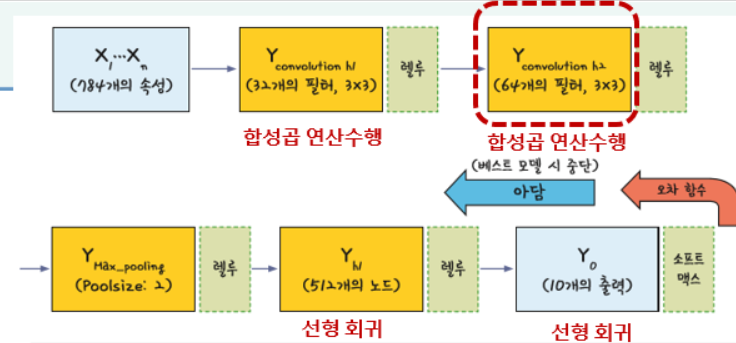

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflo

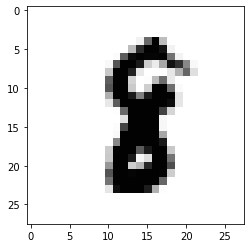

In [4]:
# ont_hot 인코딩 형태로 mnist data로드
mnist = input_data.read_data_sets("./mnist",one_hot = True)

# 이미지 한개 받아오기
X, y = mnist.train.next_batch(1)

# 불러온 데이터 확인
print("X.shape:",X.shape)

# 확인하기위해선 shape을 줘야함
plt.imshow(X.reshape(28, 28), cmap='Greys')

# X.shape 변경
X = X.reshape(1, 28, 28, 1)
print("X.reshape", X.shape)

In [5]:
initializer = tf.contrib.layers.xavier_initializer()

w1 = tf.Variable(initializer([3, 3, 1 ,32]))
print("w1.shape: ", w1.shape)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

w1.shape:  (3, 3, 1, 32)


In [6]:
# 합성곱 연산
convolution_h1 = tf.nn.conv2d(X, w1, strides=1, padding="SAME")
convolution_h1.shape

TensorShape([Dimension(1), Dimension(28), Dimension(28), Dimension(32)])

In [7]:
# 활성화 함수 relu 적용
convolution_h1 = tf.nn.relu(convolution_h1)
convolution_h1.shape

TensorShape([Dimension(1), Dimension(28), Dimension(28), Dimension(32)])

In [8]:
w2 = tf.Variable(initializer([3, 3, 32 ,64]))
w2.shape

TensorShape([Dimension(3), Dimension(3), Dimension(32), Dimension(64)])

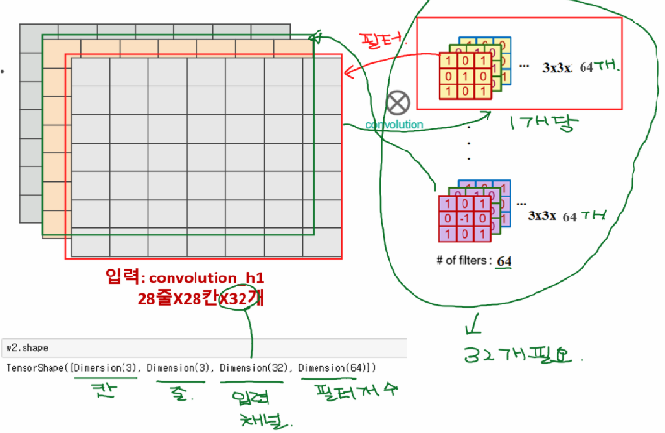

In [9]:
# 합성곱 연산
convolution_h2 = tf.nn.conv2d(convolution_h1, w2, strides=1, padding="SAME")
convolution_h2.shape

TensorShape([Dimension(1), Dimension(28), Dimension(28), Dimension(64)])

In [10]:
# 활성화 함수 적용
convolution_h2 = tf.nn.relu(convolution_h2)
convolution_h2.shape

TensorShape([Dimension(1), Dimension(28), Dimension(28), Dimension(64)])

In [11]:
# 맥스풀링
# 강의 자료에서 맥스풀링하고 렐루하는거 의미 없음
convolution_h2 = tf.nn.max_pool(convolution_h2, ksize=2, strides=1, padding="SAME")
convolution_h2.shape

TensorShape([Dimension(1), Dimension(28), Dimension(28), Dimension(64)])

In [12]:
# 활성화 함수 적용
convolution_h2 = tf.nn.relu(convolution_h2)
print("shape :",convolution_h2.shape)
print("4차원 형태 '{}'이미지 개수, {}줄, {}칸, {}, 채널".format(convolution_h2.shape[0],
                                                              convolution_h2.shape[1],
                                                              convolution_h2.shape[2],
                                                              convolution_h2.shape[3]))

shape : (1, 28, 28, 64)
4차원 형태 '1'이미지 개수, 28줄, 28칸, 64, 채널


In [13]:
convolution_h2 = tf.reshape(convolution_h2, [1, 28 * 28* 64])
print("shape :",convolution_h2.shape)

shape : (1, 50176)


In [14]:
# 필터 선언
w3 = tf.Variable(initializer([50176, 512]))
w3.shape

TensorShape([Dimension(50176), Dimension(512)])

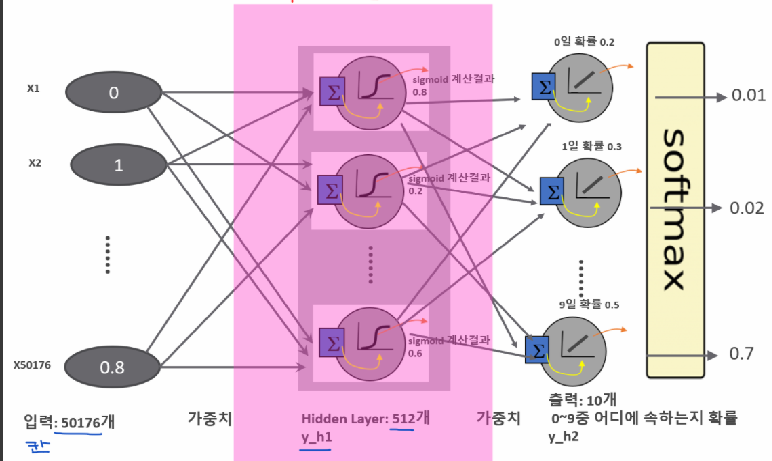

In [15]:
# 한줄로 쫙 피기
y_h1 = tf.matmul(convolution_h2, w3)
y_h1.shape

TensorShape([Dimension(1), Dimension(512)])

In [16]:
# 활성화 함수 적용
y_h1 = tf.nn.relu(y_h1)
y_h1.shape

TensorShape([Dimension(1), Dimension(512)])

In [17]:
# 필터
w4 = tf.Variable(initializer([512,10]))
w4.shape

TensorShape([Dimension(512), Dimension(10)])

In [18]:
y_h2 = tf.matmul(y_h1, w4)
print("마지막 예측값 y_h2:\n",y_h2)
print()
# 음수도 있고 뒤죽 박죽
# 따라서 softmax함수 사용

y_h2 = tf.nn.softmax(tf.matmul(y_h1, w4))
print("softmax적용한 마지막 예측값 y_h2:\n",y_h2)

마지막 예측값 y_h2:
 tf.Tensor(
[[ 0.02901543 -0.06835776 -0.01858409  0.04736834  0.00138578  0.05123864
  -0.01916803 -0.00252243  0.06603108 -0.01416755]], shape=(1, 10), dtype=float32)

softmax적용한 마지막 예측값 y_h2:
 tf.Tensor(
[[0.10212591 0.0926504  0.09737863 0.10401752 0.09934283 0.10442088
  0.09732179 0.09895533 0.10597701 0.09780967]], shape=(1, 10), dtype=float32)


In [19]:
cost = -tf.reduce_mean(y * tf.log(y_h2))

In [20]:
optimizer = tf.train.AdamOptimizer(0.001)

In [21]:
for step in range(10):
  print("*"*100)
  print("step =", step)
  print("*"*100)
# 1 epochs
  for i in range(550):
    print("=" * 100)
    print("i=", i)
    
    # 100 개씩 로드
    X, y = mnist.train.next_batch(100)

    # 학습을 위해 4차원으로 변환

    # 이미지 100장, 28 * 28, 채널은 1
    X = X.reshape(100, 28,28,1)

    with tf.GradientTape() as tape:
      # 1차 합성곱 연산합
      convolution_h1 = tf.nn.relu(tf.nn.conv2d(X, w1, strides = 1, padding = "SAME"))

      # 2차 합성곱 연산합  
      convolution_h2 = tf.nn.relu(tf.nn.conv2d(convolution_h1, w2, strides = 1, padding = "SAME"))

      # maxpool
      convolution_h2 = tf.nn.max_pool(convolution_h2, ksize = 2, strides = 1,  padding = 'SAME')

      # 2차원 배열로 reshape
      convolution_h2 = tf.reshape(convolution_h2, [-1, 28 * 28*64])

      # 
      y_h1 = tf.nn.relu(tf.matmul(convolution_h2,w3))

      y_h2 = tf.nn.softmax(tf.matmul(y_h1,w4))

      # 오차
      cost = -tf.reduce_mean( y * tf.log(y_h2))
      print("cost =", cost)

      # 기울기 수정값
      grads =  tape.gradient(cost, [w1,w2,w3,w4])

      # 기울기 수정
      optimizer.apply_gradients(grads_and_vars = zip(grads, [w1, w2, w3, w4]))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
i= 536
cost = tf.Tensor(0.0022567296, shape=(), dtype=float32)
i= 537
cost = tf.Tensor(0.00012011249, shape=(), dtype=float32)
i= 538
cost = tf.Tensor(0.00060462544, shape=(), dtype=float32)
i= 539
cost = tf.Tensor(0.004668719, shape=(), dtype=float32)
i= 540
cost = tf.Tensor(0.00017537088, shape=(), dtype=float32)
i= 541
cost = tf.Tensor(0.00056994555, shape=(), dtype=float32)
i= 542
cost = tf.Tensor(0.0024780578, shape=(), dtype=float32)
i= 543
cost = tf.Tensor(0.00111776, shape=(), dtype=float32)
i= 544
cost = tf.Tensor(8.795606e-06, shape=(), dtype=float32)
i= 545
cost = tf.Tensor(0.00020501023, shape=(), dtype=float32)
i= 546
cost = tf.Tensor(0.0001182344, shape=(), dtype=float32)
i= 547
cost = tf.Tensor(8.9445544e-05, shape=(), dtype=float32)
i= 548
cost = tf.Tensor(5.2301963e-05, shape=(), dtype=float32)
i= 549
cost = tf.Tensor(0.00051490986, shape=(), dtype=float32)
*****************************************************************************

# 실습

## MNIST CNN tensorflow1.x 

- 499 ~ 537


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflo

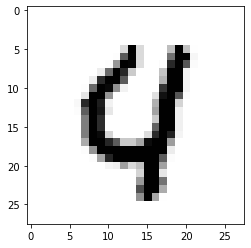

In [4]:
# ont_hot 인코딩 형태로 mnist data로드
mnist = input_data.read_data_sets("./mnist",one_hot = True)

# 이미지 한개 받아오기
X, y = mnist.train.next_batch(1)

# 불러온 데이터 확인
print("X.shape:",X.shape)

# 확인하기위해선 shape을 줘야함
plt.imshow(X.reshape(28, 28), cmap='Greys')

# X.shape 변경
X = X.reshape(1, 28, 28, 1)
print("X.reshape", X.shape)

In [5]:
initializer = tf.contrib.layers.xavier_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [6]:
# 필터 선언
w1 = tf.Variable(initializer([3, 3, 1 ,32]))
print("w1.shape: ", w1.shape)

# 합성곱 연산
convolution_h1 = tf.nn.conv2d(X, w1, strides=1, padding="SAME")
convolution_h1.shape

# 활성화 함수 relu 적용
convolution_h1 = tf.nn.relu(convolution_h1)
convolution_h1.shape

# 필터 선언
w2 = tf.Variable(initializer([3, 3, 32 ,64]))
w2.shape

# 합성곱 연산
convolution_h2 = tf.nn.conv2d(convolution_h1, w2, strides=1, padding="SAME")
convolution_h2.shape

# 활성화 함수 적용
convolution_h2 = tf.nn.relu(convolution_h2)
convolution_h2.shape

# 맥스풀링
# 강의 자료에서 맥스풀링하고 렐루하는거 의미 없음
convolution_h2 = tf.nn.max_pool(convolution_h2, ksize=2, strides=1, padding="SAME")
convolution_h2.shape

# 선형 회귀를 하기 위해 2차원 배열로 변환
convolution_h2 = tf.reshape(convolution_h2, [-1, 28 * 28 * 64])
convolution_h2.shape

# 필터 선언
w3 = tf.Variable(initializer([28 * 28 * 64, 512]))
w3.shape

# 
y_h1 = tf.matmul(convolution_h2, w3)
y_h1.shape

y_h1 = tf.nn.relu(y_h1)
y_h1.shape

# 필터 선언
w4 = tf.Variable(initializer([512, 10]))
w4.shape

# 선형 회귀
y_h2 = tf.matmul(y_h1, w4)
y_h2.shape

# 활성화 함수 적용
y_h2 = tf.nn.softmax(y_h2)
y_h2

w1.shape:  (3, 3, 1, 32)


<tf.Tensor: id=68, shape=(1, 10), dtype=float32, numpy=
array([[0.10908398, 0.10549286, 0.09282257, 0.09578682, 0.10544601,
        0.0983581 , 0.10947377, 0.08777595, 0.11173313, 0.0840268 ]],
      dtype=float32)>

In [7]:
# mnist 전체 데이터수
print("mnist 전체 데이터수 :",mnist.train.num_examples)

# 한번에 100개씩 학습
batch_size = 100

# 한번에 100개씩 학습하면 전체 학습할려면 550번 돌려야함
total_batch = int(mnist.train.num_examples / batch_size)

optimizer = tf.train.AdamOptimizer(0.001)

mnist 전체 데이터수 : 55000


In [8]:
# epochs = 5
for step in range(5):
  total_cost = 0

  for i in range(total_batch):

      # 100 개씩 로드
      X, y = mnist.train.next_batch(100)

      # 학습을 위해 4차원으로 변환
      # 이미지 100장, 28 * 28, 채널은 1
      X = X.reshape(100, 28,28,1)

      with tf.GradientTape() as tape:

        # 1차 합성곱 연산합
        convolution_h1 = tf.nn.relu(tf.nn.conv2d(X, w1, strides = 1, padding = "SAME"))

        # 2차 합성곱 연산합  
        convolution_h2 = tf.nn.relu(tf.nn.conv2d(convolution_h1, w2, strides = 1, padding = "SAME"))

        # maxpool
        convolution_h2 = tf.nn.max_pool(convolution_h2, ksize = 2, strides = 1,  padding = 'SAME')

        # 2차원 배열로 reshape
        convolution_h2 = tf.reshape(convolution_h2, [-1, 28 * 28*64])

        # 
        y_h1 = tf.nn.relu(tf.matmul(convolution_h2,w3))

        y_h2 = tf.nn.softmax(tf.matmul(y_h1,w4))

        # 오차
        cost = -tf.reduce_mean( y * tf.log(y_h2))
        print("cost =", cost)

        # 기울기 수정값
        grads =  tape.gradient(cost, [w1,w2,w3,w4])

      # 기울기 수정
      optimizer.apply_gradients(grads_and_vars = zip(grads, [w1, w2, w3, w4]))

      total_cost += cost
  print("step : {} cost {}".format(step, total_cost/total_batch))

cost = tf.Tensor(0.23098417, shape=(), dtype=float32)
cost = tf.Tensor(0.2763683, shape=(), dtype=float32)
cost = tf.Tensor(0.23283471, shape=(), dtype=float32)
cost = tf.Tensor(0.20337634, shape=(), dtype=float32)
cost = tf.Tensor(0.1656518, shape=(), dtype=float32)
cost = tf.Tensor(0.17119999, shape=(), dtype=float32)
cost = tf.Tensor(0.1494777, shape=(), dtype=float32)
cost = tf.Tensor(0.11831464, shape=(), dtype=float32)
cost = tf.Tensor(0.09666339, shape=(), dtype=float32)
cost = tf.Tensor(0.09199569, shape=(), dtype=float32)
cost = tf.Tensor(0.07085838, shape=(), dtype=float32)
cost = tf.Tensor(0.05910943, shape=(), dtype=float32)
cost = tf.Tensor(0.055959847, shape=(), dtype=float32)
cost = tf.Tensor(0.04241076, shape=(), dtype=float32)
cost = tf.Tensor(0.031090466, shape=(), dtype=float32)
cost = tf.Tensor(0.062497344, shape=(), dtype=float32)
cost = tf.Tensor(0.04706175, shape=(), dtype=float32)
cost = tf.Tensor(0.041106686, shape=(), dtype=float32)
cost = tf.Tensor(0.03317654

In [9]:
# MNIST 테스트 이미지
test_images = mnist.test.images[0:100]

# 테스트 이미지에 대한 라벨
test_labels = mnist.test.labels[0:100]

# test_image를 차원으로 변환
test_images = test_images.reshape(-1, 28, 28, 1)

# 합성곱 연산

# 1차 합성곱 연산합
convolution_h1 = tf.nn.relu(tf.nn.conv2d(test_images, w1, strides = 1, padding = "SAME"))

# 2차 합성곱 연산합  
convolution_h2 = tf.nn.relu(tf.nn.conv2d(convolution_h1, w2, strides = 1, padding = "SAME"))

# maxpool
convolution_h2 = tf.nn.max_pool(convolution_h2, ksize = 2, strides = 1,  padding = 'SAME')

# 2차원 배열로 reshape
convolution_h2 = tf.reshape(convolution_h2, [-1, 28 * 28*64])

#
y_h1 = tf.nn.relu(tf.matmul(convolution_h2, w3))

predict = tf.nn.softmax(tf.matmul(y_h1, w4))

# 가장 최댓값의 인덱스 리턴
predict01 = tf.argmax(predict, 1)

# 테스트셋 정답 인덱스 리턴
target = tf.argmax(test_labels, 1)

# 정답과 예측 동일하면 True,  틀리면 False
ac01 = tf.equal(predict01 , target)

ac02 = tf.cast(ac01, dtype = 'float32')

ac03 = tf.reduce_mean(ac02)
print("정확도 :",ac03)

정확도 : tf.Tensor(0.99, shape=(), dtype=float32)
